<div class="clearfix" style="padding: 10px; padding-left: 0px">
<a href="http://bombora.com"><img src="https://app.box.com/shared/static/e0j9v1xjmubit0inthhgv3llwnoansjp.png" width="200px" class="pull-right" style="display: inline-block; margin: 5px; vertical-align: middle;"></a>
<h1> Bombora Data Science: <br> *Interview Exam* </h1>
</div>

<img width="200px" src="https://app.box.com/shared/static/15slg1mvjd1zldbg3xkj9picjkmhzpa5.png">

---
# Welcome

Welcome! This notebook contains interview exam questions referenced in the *Instructions* section in the `README.md`—please read that first, *before* attempting to answer questions here.

<div class="alert alert-info" role="alert" style="margin: 10px">
<p style="font-weight:bold">ADVICE</p>
<p>*Do not* read these questions, and panic, *before* reading the instructions in `README.md`.</p>
</div>

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p style="font-weight:bold">WARNING</p>

<p>If using <a href="https://try.jupyter.org">try.jupyter.org</a> do not rely on the server for anything you want to last - your server will be <span style="font-weight:bold">deleted after 10 minutes of inactivity</span>. Save often and rember download notebook when you step away (you can always re-upload and start again)!</p>
</div>


## Have fun!

Regardless of outcome, getting to know you is important. Give it your best shot and we'll look forward to following up!

# Exam Questions

## 1. Algo + Data Structures

### Q 1.1: Fibionacci
![fib image](https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/Fibonacci_spiral_34.svg/200px-Fibonacci_spiral_34.svg.png)

#### Q 1.1.1
Given $n$ where $n \in \mathbb{N}$ (i.e., $n$ is an integer and $n > 0$), write a function `fibonacci(n)` that computes the Fibonacci number $F_n$, where $F_n$ is defined by the recurrence relation:

$$ F_n = F_{n-1} + F_{n-2}$$

with initial conditions of:

$$ F_1 = 1,  F_2 = 1$$

In [1]:
def fibonacci(n):
    a,b = 1,1
    
    if n <= 2:
        return 1
    
    # First two cases are handled above so only loop to n-2
    for i in xrange(n-2):
        c = a+b # Compute next term
        a,b = b,c # Update a,b
    return c

print(fibonacci(20))

6765


#### Q 1.1.2
What's the complexity of your implementation?

The time complexity of this implementation is O(n). There is only one loop and each operation in the loop is a constant time operation.

The space complexity of this implementation is constant since there is a fixed amount of memory being allocated regardless of the function input. Normally people loop with range, however the range function in python2 returns the entire list at once. This would allocate all of the memory for every value of i at once. Instead I used the xrange function because it only generates the value being used as they are being used, allowing for the recycling of the memory space.

#### Q 1.1.3
Consider an alternative implementation to compute Fibonacci number $F_n$ and write a new function, `fibonacci2(n)`.

In [2]:
# Decorator to memoize fibonacci2 function
def memoize(f):
    memo = {}
    def memoize_helper(n):
        if n in memo:
            return memo[n]
        else:
            ans = f(n)
            memo[n] = ans
            return ans
    return memoize_helper

@memoize
def fibonacci2(n):
    if n in [1,2]:
        return 1
    return fibonacci2(n-1)+fibonacci2(n-2)

print(fibonacci2(20))

6765


#### Q 1.1.4
What's the complexity of your implementation?

The time complexity of this algorithm is O(1) in the case that the answer is already memoized, and at worst O(n) in the case that it is not. The recursive calls are structured in such a way that the n-2 call answer is memoized before that call is made. This results in walking down the left side of the tree and performing a constant time look up and storage at each call, meaning an O(n) call in total.

While this method is very good in time complexity, it does require an O(n) complexity in space requirements.

#### Q 1.1.5
What are some examples of optimizations that could improve computational performance?


If memory usage is not a huge issue then these implementations could be improved by marginally by precomputing more values and keeping them stored.

### Q 1.2: Linked List
![ll img](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Singly-linked-list.svg/500px-Singly-linked-list.svg.png)

#### Q 1.2.1
Consider a [singly linked list](https://en.wikipedia.org/wiki/Linked_list), $L$. Write a function `is_palindrome(L)` that detects if $L$ is a [palindrome](https://en.wikipedia.org/wiki/Palindrome), by returning a bool, `True` or `False`.


#### Q 1.2.2
What is the complexity of your implementation?

#### Q 1.2.3
Consider an alternative implementation to detect if L is a palindrome and write a new function, `is_palindrome2(L)`.

#### Q 1.2.4
What's the complexity of this implementation?


#### Q 1.2.5 
What are some examples of optimizations that could improve computational performance?


## 2. Prob + Stats

### Q 2.1: Finding $\pi$ in a random uniform?
![pi pie img](http://core2.staticworld.net/images/article/2016/03/pi-day-intro-100649273-carousel.idge.jpeg)

Given a uniform random generator $[0,1)$ (e.g., use your language's standard libary to generate random value), write a a function `compute_pi` to compute [$\pi$](https://en.wikipedia.org/wiki/Pi).

In [3]:
import random
from math import sqrt
import matplotlib.pyplot as plt

3.1432


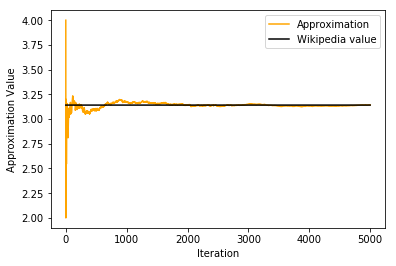

In [4]:
def magnitude(x,y):
    return sqrt(x*x + y*y)

def compute_pi(num_iterations):
    approximations = []
    in_circle_count = 0
    for i in range(num_iterations):
        x = random.random()
        y = random.random()
        if magnitude(x,y) <= 1.0:
            in_circle_count += 1
        pi_approx = (float(in_circle_count)/(i+1))*4.0
        approximations.append(pi_approx)
    return approximations

n = 5000
#
approximations = compute_pi(n)
# Print final approximation
print(approximations[-1])

#Setting up axes
plt.xlabel("Iteration")
plt.ylabel("Approximation Value")

# Plotting progression of approximations.
plt.plot(range(n), approximations, c='orange', label = "Approximation")

# Plotting approximation found on wikipedia page.
plt.plot(range(n), [3.14159]*n, c='black', label = "Wikipedia value")

plt.legend()
plt.show()
            

### Q 2.2: Making a 6-side die roll a 7?

![reno die image](http://thumbs.ebaystatic.com/images/g/IQ8AAOSwvzRXyagD/s-l225.jpg)

Using a single 6-side die, how can you generate a random number between 1 - 7?

### Q 2.3: Is normality uniform?

![normal and uniform distributions](https://qph.ec.quoracdn.net/main-qimg-f6ed71ed1d0059760fb63db384dcbcca-c)

Given draws from a normal distribution with known parameters, how can you simulate draws from a uniform distribution?

### Q 2.4: Should you pay or should you go?

![coin flip](https://lh5.ggpht.com/iwD6MnHeHVAXNBgrO7r4N9MQxxYi6wT9vb0Mqu905zTnNlBciONAA98BqafyjzC06Q=w300)

Let’s say we play a game where I keep flipping a coin until I get heads. If the first time I get heads is on the nth coin, then I pay you $2^{(n-1)}$ US dollars. How much would you pay me to play this game? Explain.

### Q 2.5: Uber vs. Lyft

![uber vs lyft](http://usiaffinity.typepad.com/.a/6a01347fc1cb08970c01bb0876bcbe970d-pi)

You request 2 UberX’s and 3 Lyfts. If the time that each takes to reach you is IID, what is the probability that all the Lyfts arrive first? What is the probability that all the UberX’s arrive first?